In [1]:
# Importing all neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()

In [3]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
data = pd.read_csv(r"C:\Users\avira\Life Expectancy Data.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
print("Columns in this dataset are -->\n")
for i in data.columns:
    print(i)

Columns in this dataset are -->

Country
Year
Status
Life expectancy 
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles 
 BMI 
under-five deaths 
Polio
Total expenditure
Diphtheria 
 HIV/AIDS
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


# Exploratory Data Analysis

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. The data in this project is from year 2000-2015 for 193 countries for further analysis.

In [6]:
print("This dataset has about {} rows and {} columns".format(data.shape[0], data.shape[1]))

This dataset has about 2938 rows and 22 columns


This dataset consists of 22 Columns and 2938 rows which meant 20 predicting variables.

The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Information about some not so obvious columns in this dataset :

Status generaly is if the country is Developed or Developing  
Adult Morality is rates of both sexes or the probability of dying between 15 and 60 years per 1000 population  
Infant Deaths are number of Infant Deaths per 1000 population  
Alcohol is recorded per capita (15+) consumption (in litres of pure alcohol)  
Percentage Expenditure is expenditure on health as a percentage of Gross Domestic Product per capita(%)  
Hepatitis B (HepB) immunization coverage among 1-year-olds  
Measles - number of reported cases per 1000 population  

In [8]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Note that the standard deviation of the features Infant deaths, Percentage Expenditure , Measles, Under five deaths,GDP,Population is a lot higher than the mean(more than twice).  

This implies that the data is not centered around its mean and are more spread out. Or we can say there is large variation in the data ranging from min-max.  

We can see there are also many outliers:  
1. Infant deaths as low as 1000.It is likely an outlier  
2. Under 5 deaths same as infant, which is perhaps even immpossible to have 0 values  
3. Population of GDP 34 of an entire Country  
4. BMI of 1 and 87.3? ( A BMI of 15 or lower is seriously underweight and a BMI of 40 or higher is morbidly obese)  
All these outliers will be dealt as null value  

In [9]:
print("No of countries in this dataset: {}".format(len(np.unique(data.Country))))
print("\nStatus of the Countries:")
data.Status.value_counts()

No of countries in this dataset: 193

Status of the Countries:


Developing    2426
Developed      512
Name: Status, dtype: int64

In [10]:
grouped_by_year = data.groupby('Year').mean()
grouped_by_year


,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,,,,,,,,,,,,,,,,,,,
2000,66.750273,181.475410,37.540984,4.570714,473.850781,74.035294,4663.792350,34.424862,53.726776,76.277778,5.585475,73.627778,2.530055,4708.515191,9.440444e+06,5.147514,5.244751,0.512214,10.512717
2001,67.128962,175.169399,36.825137,4.555659,516.625910,73.957895,4640.262295,36.135912,52.038251,77.950000,5.599609,76.661111,2.573770,4854.527638,1.007057e+07,4.957459,5.055249,0.563012,10.950289
2002,67.351366,171.437158,35.584699,4.660934,476.794487,76.522124,3204.754098,37.110497,50.300546,79.679558,5.687989,78.883978,2.573770,4599.303043,6.625328e+06,5.166298,5.118232,0.568006,11.140462
2003,67.433333,169.131148,34.874317,4.690495,494.706547,74.099237,3708.792350,36.440331,48.584699,80.353591,5.827444,78.867403,2.546995,4774.835677,1.015988e+07,4.924309,5.023757,0.572399,11.308092
2004,67.646448,186.262295,33.644809,4.753681,772.336156,77.985507,2805.497268,36.572376,47.092896,80.165746,5.859111,79.823204,2.478689,7055.889709,1.685299e+07,4.936464,5.029282,0.584168,11.547399
2005,68.209290,167.633880,32.366120,4.846409,823.318110,80.911565,3200.551913,35.607735,45.306011,80.972376,5.920722,81.674033,2.345902,7249.787557,1.828185e+07,5.099448,5.195580,0.596445,11.675723
2006,68.667760,170.404372,31.808743,4.917692,828.776319,81.894040,2063.224044,37.534254,44.273224,84.527473,5.699000,82.236264,2.169399,7347.033143,1.536564e+07,5.115470,5.157459,0.632312,11.917919
2007,69.036066,159.808743,30.612022,5.014066,954.458468,81.584906,1557.540984,36.977901,42.732240,84.802198,5.631056,84.318681,1.992896,8537.243114,1.853530e+07,5.034807,4.976243,0.639000,12.038150
2008,69.427869,174.519126,29.568306,5.007088,1095.802669,83.644172,1523.229508,38.225414,41.322404,85.565934,5.723056,84.857143,1.797268,10604.040364,9.487742e+06,4.907182,4.941436,0.645717,12.176301


How do we impute NULL VALUES ?

In genral we impute null values using the MEAN, MEDIAN Or MODE of that specific feature. Lets see how many null values does each of the features has.


In [11]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

# DATA CLEANING

<AxesSubplot:>

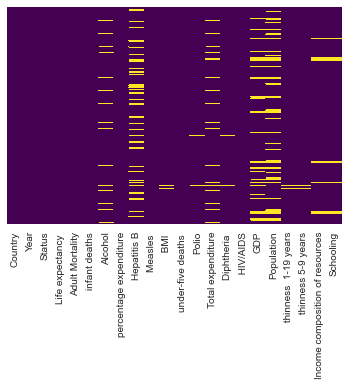

In [12]:
#sns.set(font_scale=1.5)
sns.heatmap(data.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')

We can see in columns like 'Life Expectancy' and 'Adult Mortality' there were few Nans values which wasn't visible in our heatmap.  
So lets fill them up with their average value as they are Continous features.

In [13]:
# This piece of code will fill the null values of the selected feature with its mean.
# This one is for filling Nans in 'Life expectancy' column.

data['Life expectancy ']=data['Life expectancy '].fillna(value=data['Life expectancy '].mean())

# Lets also do the same for Adult Mortality.

data['Adult Mortality']=data['Adult Mortality'].fillna(value=data['Adult Mortality'].mean())

Now Lets move on to filling the other columns as well. We will move one by one by filling the Nans of each feature. Our next in target is "ALCOHOL" feature which has almost about 194 Nans.

It is always good to fill Nans using bunch of different values as we know that a feature is less likely to have a continous value about 200 or more times and Iam pretty sure that by doing this we would definitely come up with a good result.

In [14]:
corr_matrix = data.corr()
np.abs(corr_matrix).nlargest(10, 'Life expectancy ')

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,0.169623,1.000000,0.696359,0.196535,0.404029,0.381791,0.255760,0.157574,0.564466,0.222503,0.464531,0.216373,0.478465,0.556457,0.461393,0.021548,0.476561,0.470977,0.724631,0.748263
Schooling,0.209400,0.748263,0.452380,0.193720,0.547378,0.389687,0.231117,0.137225,0.546961,0.209373,0.417866,0.246384,0.425332,0.220429,0.448273,0.031668,0.471652,0.460632,0.800092,1.000000
Income composition of resources,0.243468,0.724631,0.457530,0.145139,0.450040,0.381952,0.199549,0.129568,0.508774,0.163305,0.381078,0.166682,0.401456,0.249519,0.460341,0.008735,0.422429,0.411053,1.000000,0.800092
Adult Mortality,0.078861,0.696359,1.000000,0.078747,0.195454,0.242814,0.161828,0.031174,0.384806,0.094135,0.274218,0.114355,0.274540,0.523727,0.296019,0.013639,0.302501,0.308053,0.457530,0.452380
BMI,0.108974,0.564466,0.384806,0.227279,0.330408,0.228700,0.150380,0.175977,1.000000,0.237669,0.284569,0.242503,0.283147,0.243717,0.301557,0.072301,0.532025,0.538911,0.508774,0.546961
HIV/AIDS,0.139741,0.556457,0.523727,0.025231,0.048845,0.097857,0.112675,0.030899,0.243717,0.038062,0.159560,0.001389,0.164860,1.000000,0.136491,0.027854,0.204064,0.207283,0.249519,0.220429
Diphtheria,0.134337,0.478465,0.274540,0.175171,0.222020,0.143624,0.611495,0.141882,0.283147,0.195668,0.673553,0.152754,1.000000,0.164860,0.200666,0.028444,0.229518,0.222743,0.401456,0.425332
thinness 1-19 years,0.047876,0.476561,0.302501,0.465711,0.428795,0.251369,0.120429,0.224808,0.532025,0.467789,0.221823,0.277101,0.229518,0.204064,0.285697,0.253944,1.000000,0.939102,0.422429,0.471652
thinness 5-9 years,0.050929,0.470977,0.308053,0.471350,0.417414,0.252905,0.124960,0.221072,0.538911,0.472263,0.222592,0.283774,0.222743,0.207283,0.290539,0.251403,0.939102,1.000000,0.411053,0.460632
Polio,0.094158,0.464531,0.274218,0.170689,0.221734,0.147259,0.486171,0.136166,0.284569,0.188720,1.000000,0.137330,0.673553,0.159560,0.211976,0.038540,0.221823,0.222592,0.381078,0.417866


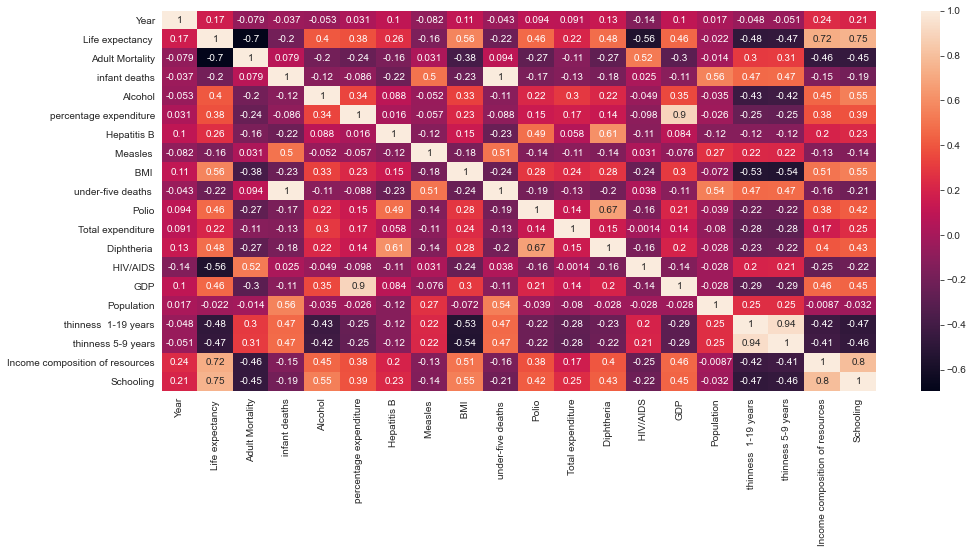

In [15]:
plt.figure(figsize=(16,7))
sns.heatmap(corr_matrix, annot = True)
plt.show()

The DARKEST and the LIGHTEST blocks represets that there is a strong relationship between those attributes.

**Values that actually affect Life expectancy**

1. Schooling(+0.75)
2. Income composition of resources(+0.69)
3. HIV/AIDS(-0.56)
4. Adult mortality(-0.7)
5. BMI(+0.57)
6. thinness 1-19years(-0.47)
7. thiness 5-9years(-0.46)
8. GDP(+0.46)
9. Diphtheria(+0.48)
10. Polio(+0.47)

From the above correlation matrix 'Alcohol' feature nicely correlates with the 'Schooling' feature.

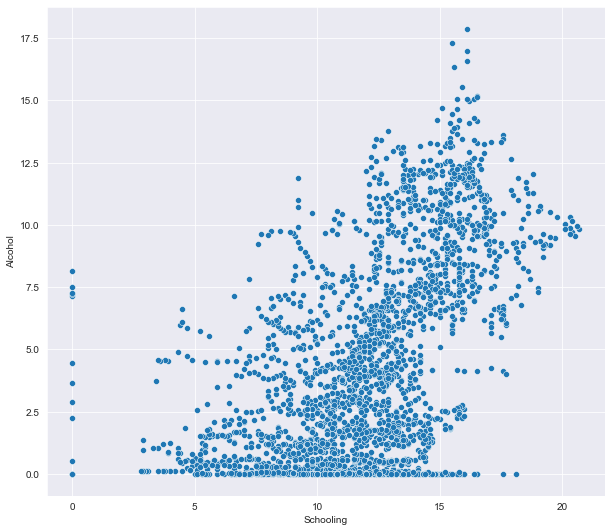

In [16]:
plt.figure(figsize=(10,9))
sns.scatterplot(x=data['Schooling'],y=data['Alcohol']);

I have selected these values for imputing the Nans by observing a the trends in between selected interval.
Ex: The mean value of Alcohol which is in between 5-10 of Schooling column is 4.0

In [17]:
# These values are mean values of the selected interval of other feature.

def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc<=2.5:
            return 4.0
        elif 2.5<sc<=5.0:
            return 1.5
        elif 5.0<sc<=7.5:
            return 2.5
        elif 7.5<sc<=10.0:
            return 3.0
        elif 10.0<sc<=15:
            return 4.0
        elif sc>15:
            return 10.0
    else:
        return al
    
data['Alcohol']=data[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)

<AxesSubplot:>

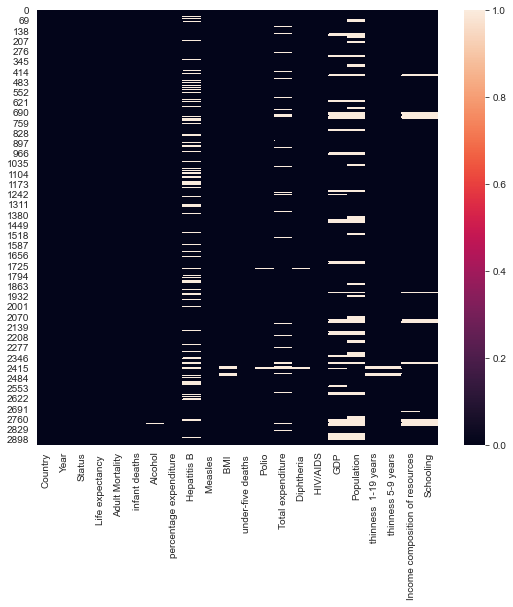

In [18]:
plt.figure(figsize=(9,8))
sns.heatmap(pd.isnull(data))

If we could observe from the heatmap the zone in which null values were failed to be filled is the same zone in which the other feature had its Null values. So for now lets fill those remaining Nans with the Mean Value

In [19]:
data['Alcohol']=data['Alcohol'].fillna(value=data['Alcohol'].mean())

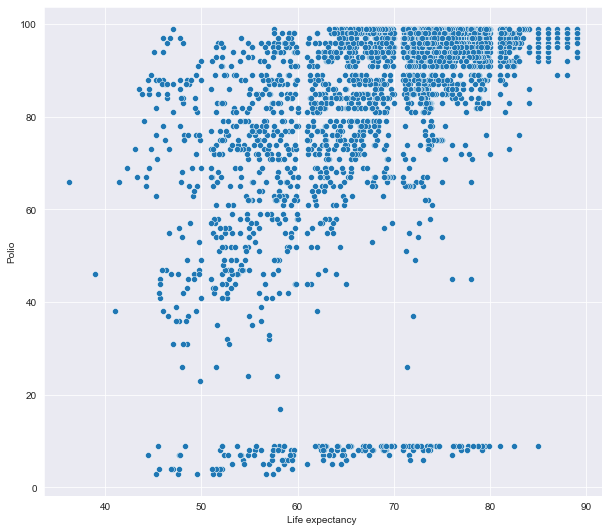

In [20]:
plt.figure(figsize=(10,9))
sns.scatterplot(x=data['Life expectancy '],y=data['Polio']);

# Scattterplot between them.


Imputing the selected values for each interval. It is the same way like we did for the 'Alcohol' feature.

In [21]:
def impute_polio(c):
    p=c[0]
    l=c[1]
    if pd.isnull(p):
        if l<=45:
            return 80.0
        elif 45<l<=50:
            return 67.0
        elif 50<l<=60:
            return 87.44
        elif 60<l<=70:
            return 91
        elif 70<l<=80:
            return 94.3
        elif l>80:
            return 95
    else:
        return p
    
data['Polio']=data[['Polio','Life expectancy ']].apply(impute_polio,axis=1)


Now we dont have any nulls in polio section. Lets impute 'Diphtheria' using 'Polio' feature.

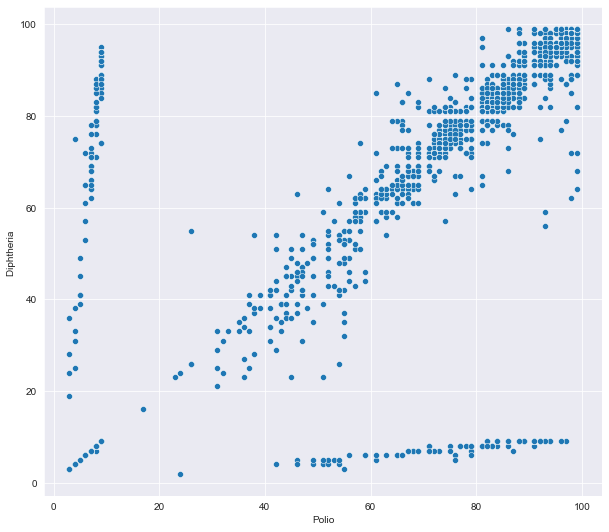

In [22]:
# Scatter plot between these features.
plt.figure(figsize=(10,9))
sns.scatterplot(x=data['Polio'],y=data['Diphtheria ']);

In [23]:
def impute_Diptheria(c):
    d=c[0]
    p=c[1]
    if pd.isnull(d):
        if p<=10:
            return 75.0
        elif 10<p<=40:
            return 37.0
        elif 40<p<=45:
            return 40.0
        elif 45<p<=50:
            return 50.0
        elif 50<p<=60:
            return 55.0
        elif 60<p<=80:
            return 65.0
        elif p>80:
            return 90.0
    else:
        return d
data['Diphtheria ']=data[['Diphtheria ','Polio']].apply(impute_Diptheria,axis=1)

Now its time for imputing 'Hepatitis B' using 'Diptheria' feature.

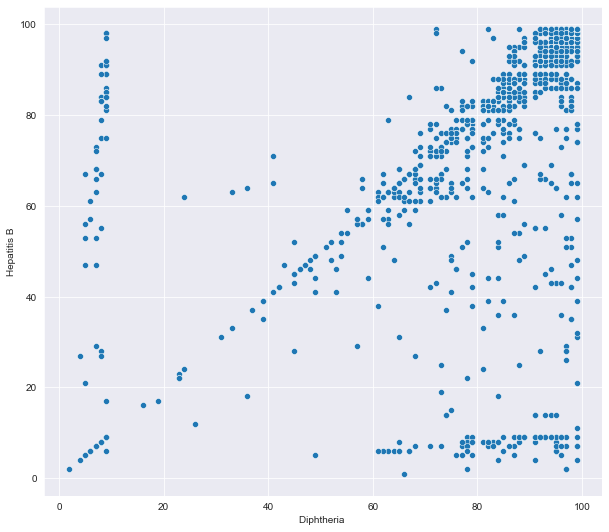

In [24]:
plt.figure(figsize=(10,9))
sns.scatterplot(x=data['Diphtheria '],y=data['Hepatitis B']);

# Scatterplot between them.

In [25]:
def impute_HepatatisB(cols):
    hep=cols[0]
    dip=cols[1]
    if pd.isnull(hep):
        if dip<=15:
            return 75.0
        elif 15<dip<=30:
            return 20.0
        elif 30<dip<=45:
            return 38.0
        elif 45<dip<=60:
            return 43.0
        elif 60<dip<=80:
            return 63.0
        elif dip>80:
            return 88.4
    else:
        return hep
    
data['Hepatitis B']=data[['Hepatitis B','Diphtheria ']].apply(impute_HepatatisB,axis=1)

In [26]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                  226
Diphtheria                           0
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Lets repeat this for all the features.

Here is the list of features that we are going to impute with other features:

1. Impute 'BMI' feature with 'Life expactancy' feature.
2. Impute 'Total expenditure' with 'Alcohol' feature.
3. Impute 'GDP' feature with 'percentage expenditure ' feature.
4. Impute 'Population' feature with 'Infant death' feature.
5. Impute 'Thin 1-19' feature with 'BMI' feature.
6. Impute 'Thin 5-9' feature with 'BMI' feature.
7. Impute 'Schooling' feature and 'Income Composition of resources' feature with 'Life expactancy' feature.
Lets begin the process of imputing.

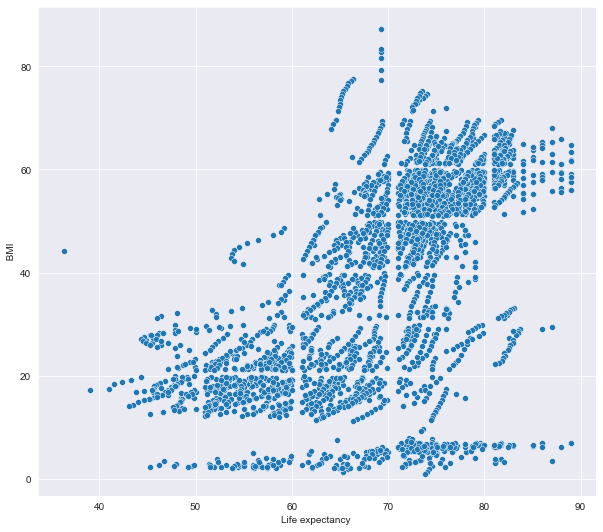

In [27]:
plt.figure(figsize=(10,9))
sns.scatterplot(x=data['Life expectancy '],y=data[' BMI ']);

In [28]:
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return 25.0
        elif 50<l<=60:
            return 25.0
        elif 60<l<=70:
            return 32.0
        elif 70<l<=80:
            return 46.8
        elif 80<l<=100:
            return 60.0
    else:
        return b
    
data[' BMI ']=data[[' BMI ','Life expectancy ']].apply(impute_BMI,axis=1)

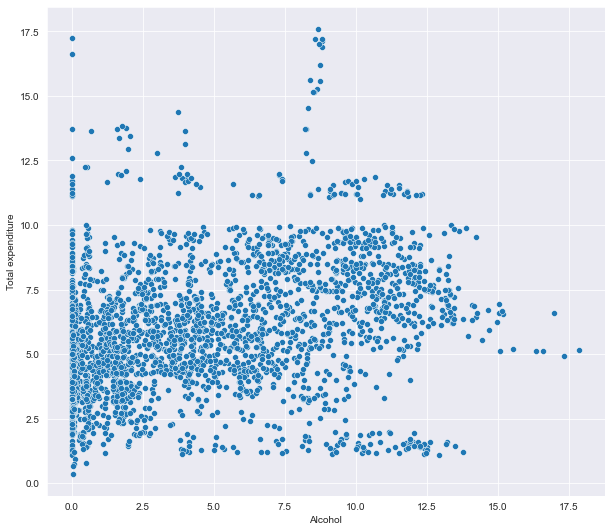

In [29]:
plt.figure(figsize=(10,9))
sns.scatterplot(y=data['Total expenditure'],x=data['Alcohol']);

In [30]:
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return 5.08
        elif 2.5<a<=5.0:
            return 6.0
        elif 5.0<a<=10.0:
            return 6.71
        elif 10.0<a<=12.5:
            return 6.9
        elif a>12.5:
            return 6.68
    else:
        return t
    
data['Total expenditure']=data[['Total expenditure','Alcohol']].apply(impute_Total_exp,axis=1)   

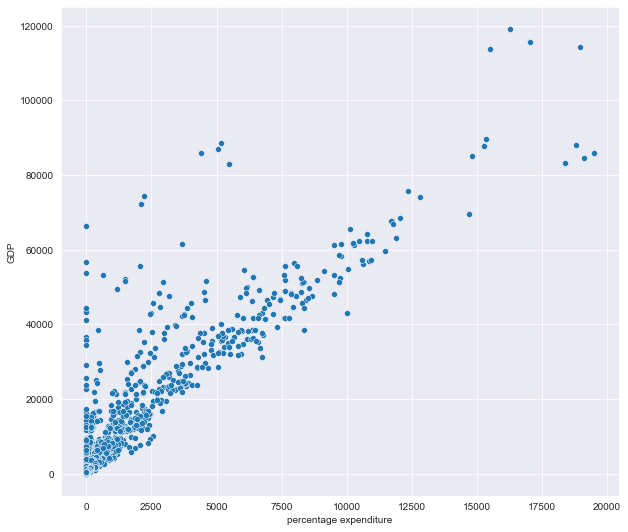

In [31]:
plt.figure(figsize=(10,9))
sns.scatterplot(x=data['percentage expenditure'],y=data['GDP']);

In [32]:
def impute_GDP(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=1250:
            return 1100.0
        elif 1250<p<=2500:
            return 1800.0
        elif 2500<p<=3750:
            return 2900.0
        elif 3750<p<=7500:
            return 3500.0
        elif 7500<p<=8750:
            return 4500.0
        elif 8750<p<=10000:
            return 5000.0
        elif 10000<p<=11250:
            return 5700.0
        elif 11250<p<=12500:
            return 7000.0
        elif 12500<p<=15000:
            return 8000.0
        elif 15000<p<=17500:
            return 9000.0
        elif p>17500:
            return 8500.0
    else:
        return g
    
data['GDP']=data[['GDP','percentage expenditure']].apply(impute_GDP,axis=1)

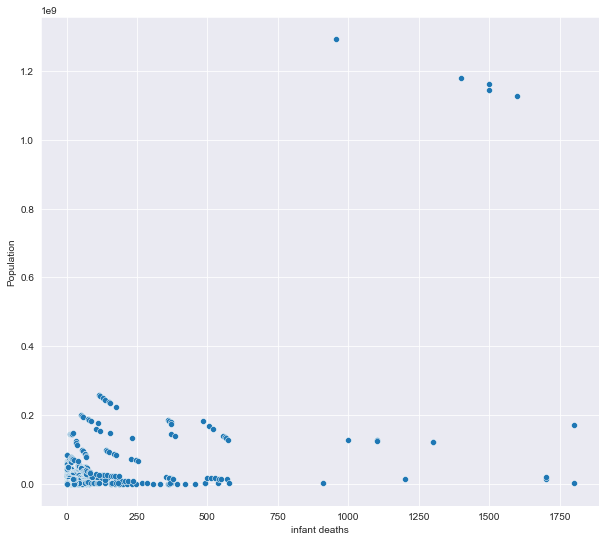

In [33]:
plt.figure(figsize=(10,9))
sns.scatterplot(x=data['infant deaths'],y=data['Population']);

In [34]:
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return 0.19*((10)**9)
        elif 100<i<=250:
            return 0.18*((10)**9)
        elif 250<i<=350:
            return 0.02*((10)**9)
        elif 350<i<=900:
            return 0.1*((10)**9)
        elif 900<i<=1100:
            return 0.18*((10)**9)
        elif 1100<i<=1250:
            return 0.05*((10)**9)
        elif 1250<i<=1500:
            return 0.19*((10)**9)
        elif 1500<i<=1750:
            return 0.05*((10)**9)
        elif i>1750:
            return 0.1*((10)**9)
    else:
        return p
    
data['Population']=data[['Population','infant deaths']].apply(impute_population,axis=1)


In [35]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

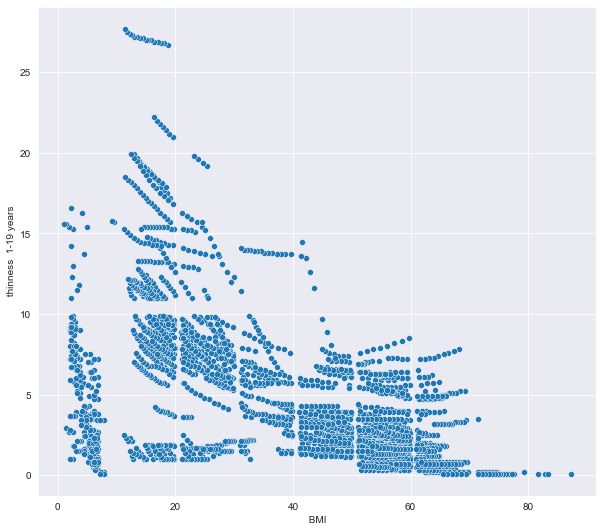

In [36]:
plt.figure(figsize=(10,9))
sns.scatterplot(x=data[' BMI '],y=data[' thinness  1-19 years']);

In [37]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
data[' thinness  1-19 years']=data[[' thinness  1-19 years',' BMI ']].apply(impute_Thin_1,axis=1)

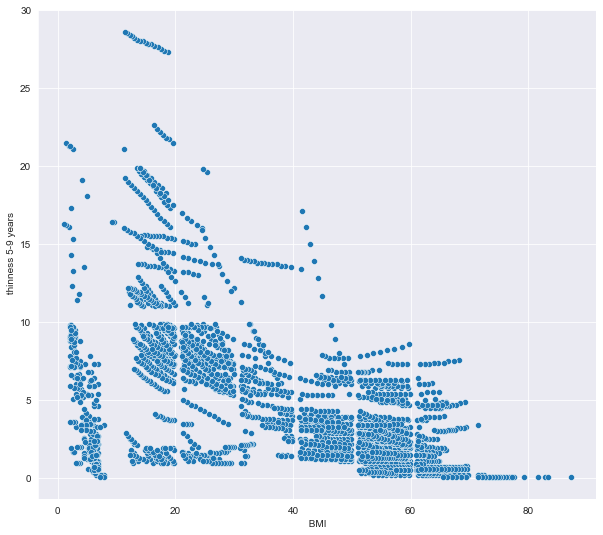

In [38]:
plt.figure(figsize=(10,9))
sns.scatterplot(x=data[' BMI '],y=data[' thinness 5-9 years']);

In [39]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
data[' thinness 5-9 years']=data[[' thinness 5-9 years',' BMI ']].apply(impute_Thin_1,axis=1)

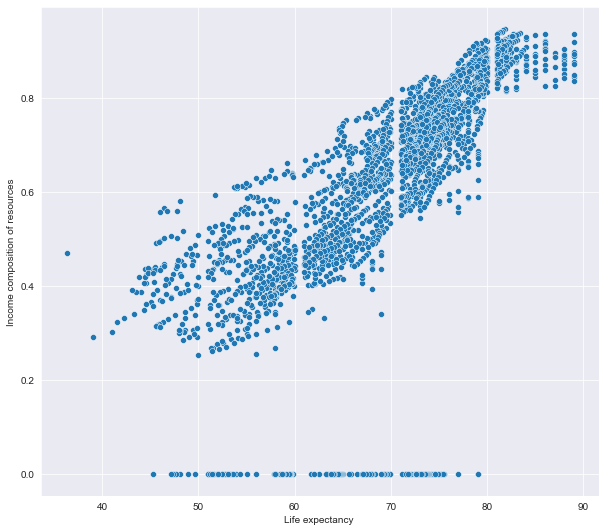

In [40]:
plt.figure(figsize=(10,9))
sns.scatterplot(x=data['Life expectancy '],y=data['Income composition of resources']);

In [41]:

def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.4
        elif 40<l<=50:
            return 0.42
        elif 50<l<=60:
            return 0.402
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.71
        elif l>80:
            return 0.88
    else:
        return i
        
data['Income composition of resources']=data[['Income composition of resources','Life expectancy ']].apply(impute_Income,axis=1)    

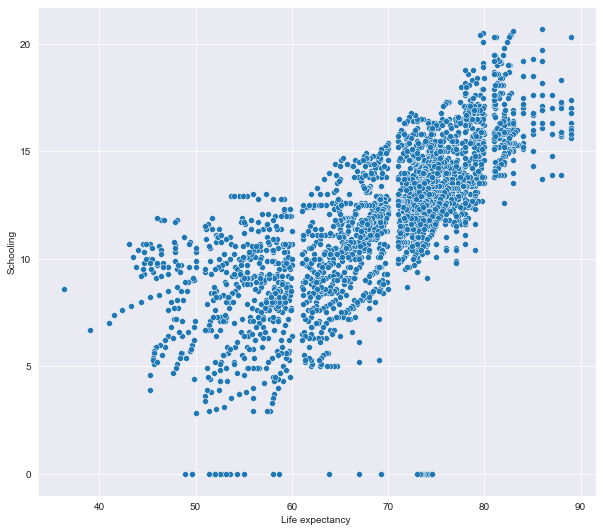

In [42]:
plt.figure(figsize=(10,9))
sns.scatterplot(x=data['Life expectancy '],y=data['Schooling']);

In [43]:
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return 8.0
        elif 40<l<=44:
            return 7.5
        elif 44<l<50:
            return 8.1
        elif 50<l<=60:
            return 8.2
        elif 60<l<=70:
            return 10.5
        elif 70<l<=80:
            return 13.4
        elif l>80:
            return 16.5
    else:
        return s
    
data['Schooling']=data[['Schooling','Life expectancy ']].apply(impute_schooling,axis=1)

In [44]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

Finaly our Dataset is Cleaned

# Data Visualisation

In [45]:
plt.figure(figsize=(7,7))
arr = data.groupby('Year').mean()['Life expectancy ']
arr.iplot()

<Figure size 504x504 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

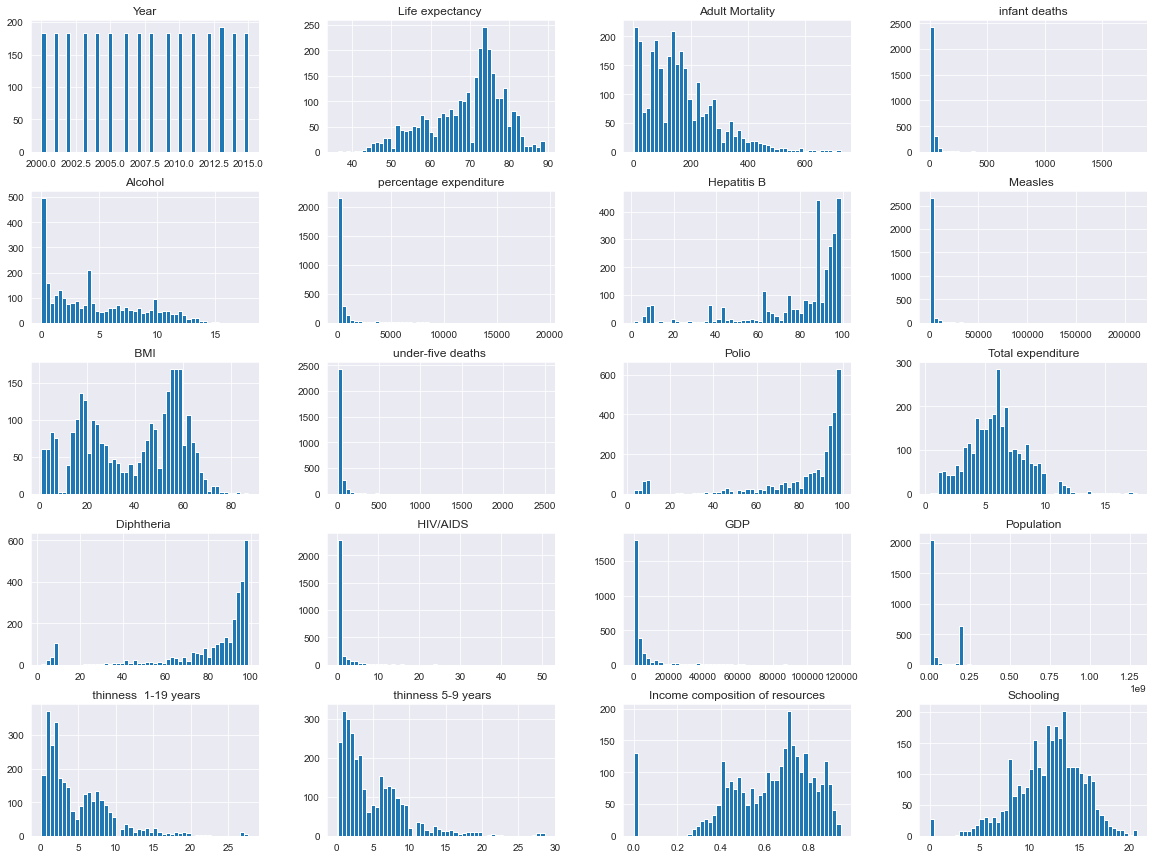

In [46]:
plt.figure(figsize = (35,20))
data.hist(bins = 50,figsize = (20,15))
plt.show()

In [47]:
plt.figure(figsize=(10,8))
px.histogram(data, x="Status", color_discrete_sequence=['indianred'])

<Figure size 720x576 with 0 Axes>

In [48]:
plt.figure(figsize=(7,7))
px.line(grouped_by_year, y='Adult Mortality', title = 'Adult Death Mortality Rate')

<Figure size 504x504 with 0 Axes>

In [49]:
fig = px.scatter(data, y="GDP")
fig.show()

In [50]:
px.line(grouped_by_year, y='Schooling', title = 'Adult Death Mortality Rate')

In [51]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Linear Regression

In [52]:
X=data.drop('Life expectancy ',axis=1)
y=data['Life expectancy ']

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Adult Mortality                  2938 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2938 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 12  Total expenditure   

There are 'object' type of features in our Predictor(X) dataset. Lets explore them and try to convert them into numericals.

In [54]:
Country_dummy=pd.get_dummies(X['Country'])
status_dummy=pd.get_dummies(X['Status'])
# Dummy variables for Country feature.

Now lets concatenate these 'Dummies' with our X dataset.

firstly lets drop those two object features and then concatenate it.

In [55]:
X.drop(['Country','Status'],inplace=True,axis=1)
X=pd.concat([X,Country_dummy,status_dummy],axis=1)

In [56]:
# Lets set 30% for testing and 70% for training the model.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [57]:
Linear_model= LinearRegression()

In [58]:
Linear_model.fit(X_train,y_train)

LinearRegression()

In [59]:
predictions1=Linear_model.predict(X_test)


In [60]:
# First 10 predictions.

predictions1[0:10]

array([52.90003432, 54.39454364, 83.57223797, 63.42111766, 73.59599301,
       72.44789088, 69.22029695, 80.42833482, 60.73071466, 82.95627229])

In [62]:
r2_score(y_test,predictions1)*100

95.76136127066506

This is probably the best score

Final Result:

1. Schooling has a positive impact on the lifespan of human beings.There is also a high correlation of 0.71.  
2. Alcohol also has a positive correlation on the lifespan. Surprisingly 0.4 or may be not  
3. Immunization also has a positive correlations with life expectancy.  
4. Densely populated countries tends to have lower life expectancy.  
5. BMI or body mass index has a positive corr with life expectancy which should be true    